In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
#Remove later
import os
# os.chdir("C:/Users/Joanne/Documents/Statistics/")
os.chdir("C:/Users/qi750922/Documents/")

# Read in the Data

In [3]:
df_tic = pd.read_table("2023-08-18-IS-tic.csv",sep=',',header=None)
df_tic.head()

,0,1,2,3,4,5,6,7,8,9,...,2790,2791,2792,2793,2794,2795,2796,2797,2798,2799
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_labels = pd.read_table("2023-08-18-MixDat.csv",sep=',')

#Double check this if correct. Only look at class column
df_labels = df_labels["class"]
df_labels.head()

0    IL
1    IL
2    IL
3    IL
4    IL
Name: class, dtype: object

# Split into train and test groups

In [5]:
from sklearn.model_selection import train_test_split
np.random.seed(1)
feat_train, feat_test, resp_train, resp_test = train_test_split(df_tic, df_labels, test_size=0.25)
print(feat_train.head())

       0     1     2     3     4     5     6     7     8     9     ...  2790  \
25772     0     0     0     0     0     0     0     0     0     0  ...     0   
45791     0     0     0     0     0     0     0     0     0     0  ...     0   
25396     0     0     0     0     0     0     0     0     0     0  ...     0   
43835     0     0     0     0     0     0     0     0     0     0  ...     0   
15782     0     0     0     0     0     0     0     0     0     0  ...     0   

       2791  2792  2793  2794  2795  2796  2797  2798  2799  
25772     0     0     0     0     0     0     0     0     0  
45791     0     0     0     0     0     0     0     0     0  
25396     0     0     0     0     0     0     0     0     0  
43835     0     0     0     0     0     0     0     0     0  
15782     0     0     0     0     0     0     0     0     0  

[5 rows x 2800 columns]


# Scale and Center Columns with Mean and Standard Deviation

In [6]:
# Code from knn_svm_python.ipynb
np.random.seed(1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# get mean and standard deviation for each column according to train data
scaler.fit(feat_train)
# scale columns of train and test data
feat_train = scaler.transform(feat_train)
feat_test = scaler.transform(feat_test)

pd.DataFrame(feat_train).head()

,0,1,2,3,4,5,6,7,8,9,...,2790,2791,2792,2793,2794,2795,2796,2797,2798,2799
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Machine Learning Models:

# Logistic Regression: 

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [8]:
np.random.seed(1)
logReg = LogisticRegression(max_iter=1500).fit(feat_train, resp_train)
logReg_yhat = logReg.predict(feat_test)

In [9]:
# print(logReg_yhat)
# print(resp_test)
np.random.seed(1)

# Here i made numerical representations for the sake of calculating MSE
logReg_yhat_numRep = []
resp_test_numRep = []

for i in range(len(logReg_yhat)):
    if (logReg_yhat[i] == "IL"):
        logReg_yhat_numRep.append(1)
    elif (logReg_yhat[i] == "SUB"):
        logReg_yhat_numRep.append(0)

for val in resp_test:
    if (val == "IL"):
        resp_test_numRep.append(1)
    elif (val == "SUB"):
        resp_test_numRep.append(0)

# print(logReg_yhat_numRep)
# print(resp_test_numRep)

error = mean_squared_error(logReg_yhat_numRep,resp_test_numRep,squared=False)
print(f"{error} is the MSE of logistic regression")

0.07211102550927978 is the MSE of logistic regression


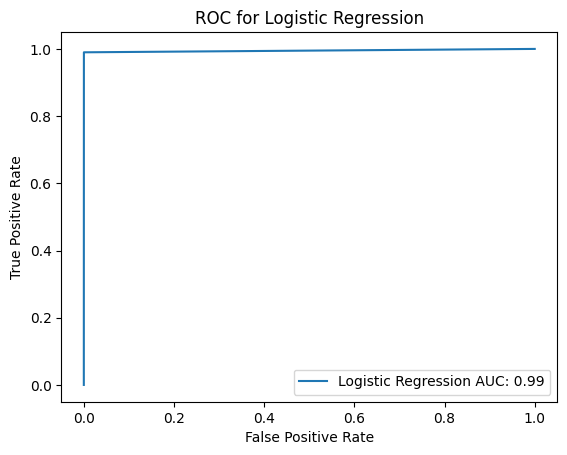

In [10]:
# Code adapted from knn_svm_python.ipynb
# Create an ROC curve for Logistic Regression
np.random.seed(1)
from sklearn.metrics import roc_curve, auc

# metrics for logistic regression
fpr_log, tpr_log, _ = roc_curve(resp_test_numRep, logReg_yhat_numRep)
auc_log = auc(fpr_log, tpr_log)

# plot the info
plt.plot(fpr_log, tpr_log, label='Logistic Regression AUC: {0:0.2f}'.format(auc_log))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistic Regression')
plt.legend(loc='lower right')

# MAGIC Dataset

# Read in Data

In [11]:
# 4:50 start 
magic = pd.read_table("magic04.data",sep=',',header=None)
magic = magic.rename(columns={0: 'fLength', 1:'fWidth',2:'fSize',3:'fConc',4:'fConc1',5:'fAsym',6:'fM3Long',7:'fM3Trans',8:'fAlpha',9:'fDist',10:'class'})
magic.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [12]:
# Convert class column to categorical
magic["class"] = magic["class"].astype('category')
magic.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [13]:
# Separate features/predictors from response
magic_feats = magic.drop(columns=['class'])
magic_resp = np.array(magic['class'])

print(magic_feats[:5])
print(magic_resp)

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  
0  40.0920   81.8828  
1   6.3609  205.2610  
2  76.9600  256.7880  
3  10.4490  116.7370  
4   4.6480  356.4620  
['g' 'g' 'g' ... 'h' 'h' 'h']


# Split into Training and Testing Sets

In [14]:
from sklearn.model_selection import train_test_split
np.random.seed(1)
m_feat_train, m_feat_test, m_resp_train, m_resp_test = train_test_split(magic_feats, magic_resp, test_size=0.25)
print(m_feat_train.head())

        fLength   fWidth   fSize   fConc  fConc1    fAsym   fM3Long  fM3Trans  \
9667   103.8240  34.1769  3.1958  0.1644  0.0876  15.2711   95.6895   14.6144   
18049   35.1524  27.2944  2.6748  0.2895  0.1301  -1.0007  -19.9024  -15.4176   
11947   62.0676  16.9250  3.1730  0.2189  0.1306  60.4294   42.5727   13.3678   
9251    13.0301  11.1805  2.1351  0.7546  0.3773  14.9999    0.4644  -11.8252   
13458  144.6510  40.3478  2.9380  0.6182  0.4988 -74.6539 -155.4890  -42.0003   

        fAlpha     fDist  
9667   35.2160  164.4260  
18049  54.3607  170.7192  
11947   0.0260  197.9060  
9251   35.0960  146.6610  
13458  38.0104  280.0510  


# Scale and Center Columns with Mean and Standard Deviation

In [15]:
# Code from knn_svm_python.ipynb
np.random.seed(1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# get mean and standard deviation for each column according to train data
scaler.fit(m_feat_train)
# scale columns of train and test data
feat_train = scaler.transform(m_feat_train)
feat_test = scaler.transform(m_feat_test)

# Machine Learning Models

# Logistic Regression:

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [17]:
np.random.seed(1)
m_logReg = LogisticRegression(max_iter=1500).fit(m_feat_train, m_resp_train)
m_logReg_yhat = m_logReg.predict(m_feat_test)

In [18]:
# print(m_logReg_yhat)
# print(m_resp_test)

np.random.seed(1)
# # Here i made numerical representations for the sake of calculating MSE
m_logReg_yhat_numRep = []
m_resp_test_numRep = []

for val in m_logReg_yhat:
    if (val == "g"):
        m_logReg_yhat_numRep.append(1)
    elif (val == "h"):
        m_logReg_yhat_numRep.append(0)

for val in m_resp_test:
    if (val == "g"):
        m_resp_test_numRep.append(1)
    elif (val == "h"):
        m_resp_test_numRep.append(0)

print(m_logReg_yhat_numRep)
print(m_resp_test_numRep)

error = mean_squared_error(m_logReg_yhat_numRep,m_resp_test_numRep,squared=False)
print(f"{error} is the MSE of logistic regression")

[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 

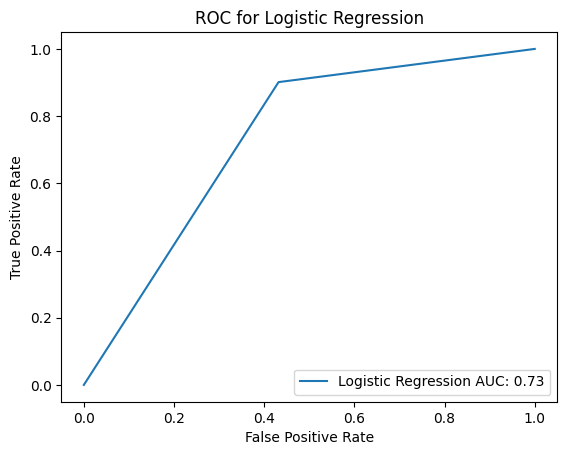

In [19]:
# Code adapted from knn_svm_python.ipynb
# Create an ROC curve for Logistic Regression
np.random.seed(1)
from sklearn.metrics import roc_curve, auc

# metrics for logistic regression
m_fpr_log, m_tpr_log, _ = roc_curve(m_resp_test_numRep, m_logReg_yhat_numRep)
m_auc_log = auc(m_fpr_log, m_tpr_log)

# plot the info
plt.plot(m_fpr_log, m_tpr_log, label='Logistic Regression AUC: {0:0.2f}'.format(m_auc_log))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistic Regression')
plt.legend(loc='lower right')